In [1]:
# Import des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ModuleNotFoundError: No module named 'numpy'

In [ ]:
# Charger le jeu de données Boston Housing
# boston = fetch_openml(name='Boston', version=1, as_frame=True)
# boston
# Conversion en DataFrame
df = boston.frame
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# Etape 2 – Statistiques descriptives

In [ ]:
# Informations générales
# df.info()

# Statistiques descriptives
df.describe()

# Vérifier la présence de valeurs manquantes
# df.isnull().sum()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

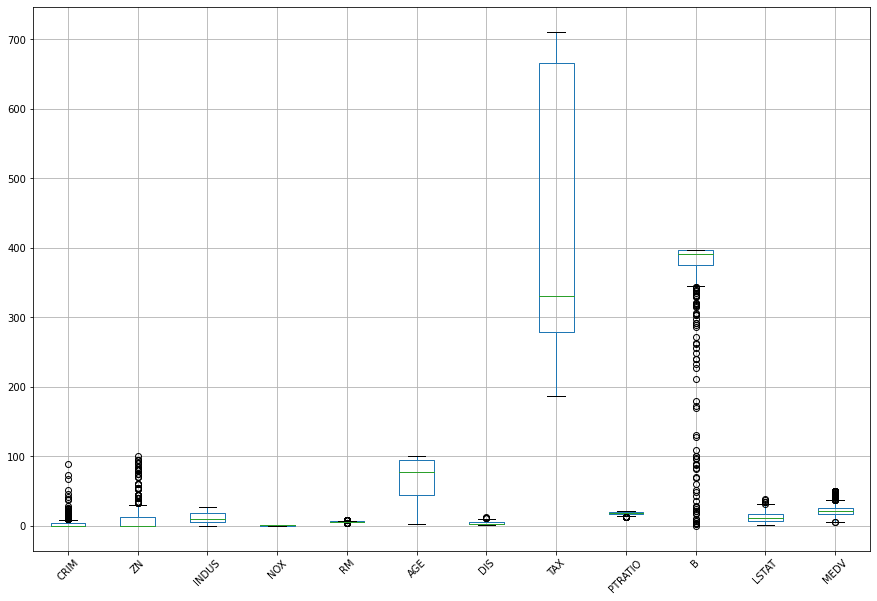

In [ ]:
plt.figure(figsize = (15, 10)) 
df.boxplot(rot = 45) 

# Etape 3 – Nettoyage et normalisation (facultatif)

In [ ]:
print("Le jeu etant déja propre pas besoin de nettoyer celui ci")

Le jeu etant déja propre pas besoin de nettoyer celui ci


,MEDV
MEDV,1.000000
RM,0.695360
ZN,0.360445
B,0.333461
DIS,0.249929
AGE,-0.376955
CRIM,-0.388305
NOX,-0.427321
TAX,-0.468536
INDUS,-0.483725


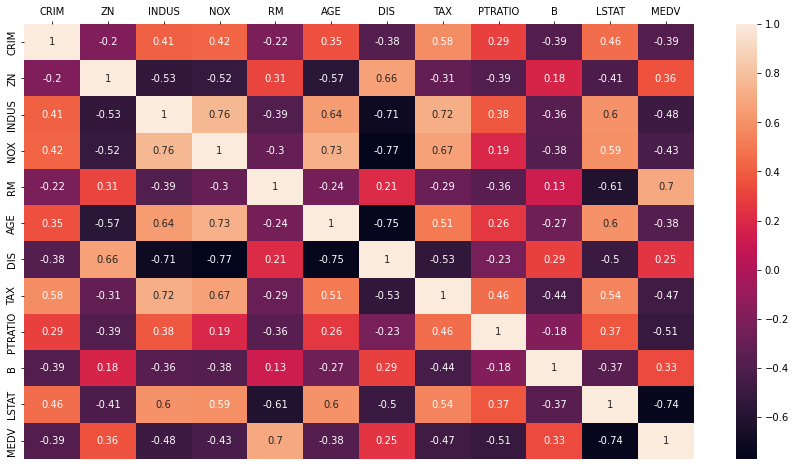

In [ ]:
# mat_corr = df.corr() 
# mat_corr
plt.figure(figsize=(15,8))
ax = sns.heatmap(mat_corr, annot=True)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
mat_corr.tail(1).T
mat_corr.tail(1).T.sort_values(by = 'MEDV', ascending = False) 

# Etape 4 – Régression linéaire simple

In [ ]:
# X : variable indépendante → ici "RM" (nombre moyen de pièces)
# y : variable dépendante → ici "MEDV" (prix médian des maisons)
X = df[['RM']]
# X = df[['LSTAT']]
y = df['MEDV']

In [ ]:
print("Variables utilisées :")
print("- X : nombre moyen de pièces (RM)")
print("- y : prix médian des maisons (MEDV, en milliers de dollars)\n")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Jeu de données divisé : 80% entraînement, 20% test\n")

Variables utilisées :
- X : nombre moyen de pièces (RM)
- y : prix médian des maisons (MEDV, en milliers de dollars)

Jeu de données divisé : 80% entraînement, 20% test



In [ ]:
# Création et entraînement du modèle de régression linéaire
model_simple = LinearRegression()
model_simple
model_simple.fit(X_train, y_train)
# print("Modèle de régression linéaire entraîné avec la variable RM.\n")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Prédiction sur le jeu de test
y_pred_simple = model_simple.predict(X_test)
print("Prédictions effectuées sur le jeu de test.\n")
y_pred_simple

Prédictions effectuées sur le jeu de test.



array([26.09951047, 31.42509574, 17.37173642, 29.50169924, 18.14496114,
       23.26757492, 17.12043839, 11.48556323, 22.39769711, 20.986562  ,
       17.51671606, 18.3092714 , -0.90536293, 22.90995849, 23.48987703,
       23.5671995 , 17.84533656,  5.2417736 , 31.96635304, 17.31374457,
       28.46751118, 27.88759264, 12.99335144, 25.490596  , 19.66241466,
       17.30407926, 26.04151861, 16.75315664, 18.14496114, 21.2088641 ,
       20.63861087, 27.87792733, 21.8467745 , 24.98799993, 14.23051099,
       19.57542688, 30.94183029, 25.36494698, 20.6676068 , 27.54930682,
       14.40448655, 27.55897213, 32.05334082, 22.18506031, 26.32181257,
       18.29960609, 17.10110777, 28.34186216, 19.09216143, 30.02362593,
       22.01108475, 30.40057298, 16.74349134, 27.4236578 , 31.78271217,
       24.61105288, 18.80220216, 31.61840192, 25.53892254, 16.99478937,
       25.65490625, 30.18793618, 31.20279363, 23.53820358, 29.53069517,
       12.51975129, 18.28994078, 28.34186216, 30.66153632, 16.46

In [ ]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64

In [ ]:
# Évaluation du modèle avec deux métriques :
#     - R² : qualité du modèle (variance expliquée)
#     - RMSE : erreur moyenne (en milliers de dollars)
r2_simple = r2_score(y_test, y_pred_simple)
rmse_simple = np.sqrt(mean_squared_error(y_test, y_pred_simple))
print(rmse_simple)
print(r2_simple)

5.789606996393182
0.5429180422970386


In [ ]:
print("📊 Résultats de la régression linéaire simple :")
print(f" - Coefficient (pente) : {model_simple.coef_[0]:.4f}")
print(f" - Intercept (ordonnée à l'origine) : {model_simple.intercept_:.4f}")
# print(f" - R² (variance expliquée) : {r2_simple:.4f}")
# print(f" - RMSE (erreur moyenne) : {rmse_simple:.4f}\n")

# #Interprétation des résultats
# print("Interprétation :")
print(f"Chaque pièce supplémentaire augmente le prix moyen d'environ {model_simple.coef_[0]} $.")
print("L'intercept est une constante d'ajustement sans signification économique directe.")
# print(f"Le modèle explique {r2_simple*100:.1f}% de la variation du prix des maisons (R²).")
# print(f"L'erreur moyenne est d'environ {rmse_simple*1000:.0f} $, ce qui reste raisonnable pour un modèle simple.")


📊 Résultats de la régression linéaire simple :
 - Coefficient (pente) : 9.3483
 - Intercept (ordonnée à l'origine) : -36.2463
Chaque pièce supplémentaire augmente le prix moyen d'environ 9.348301406497727 $.
L'intercept est une constante d'ajustement sans signification économique directe.


# Etape 5 – Visualisation (simple)

<Figure size 1080x720 with 0 Axes>

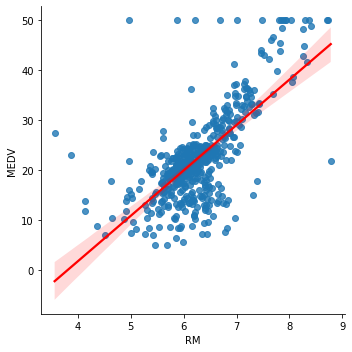

In [ ]:
# Visualisation des prédictions du modèle simple
# print("📊 Visualisation du modèle de régression linéaire simple")
# print("→ Ce graphique compare les prix réels (en abscisse) et les prix prédits par le modèle (en ordonnée).")
# print("→ Plus les points sont proches de la diagonale, meilleure est la qualité de la prédiction.\n")

plt.figure(figsize=(15,10))
# sns.scatterplot(x=y_test, y=y_pred_simple)
# plt.xlabel("Valeurs réelles MEDV (en milliers de $)")
# plt.ylabel("Valeurs prédites MEDV (en milliers de $)")
# plt.title("Régression linéaire simple : RM vs MEDV")
# plt.grid(True)
# plt.show()

# Relation brute entre RM et MEDV
# print("📈 Relation brute entre RM et MEDV")
# print("→ L’axe des abscisses représente le nombre moyen de pièces par logement (RM).")
# print("→ L’axe des ordonnées représente le prix médian des maisons (MEDV) en milliers de $.")
# print("→ La ligne rouge représente la droite de régression ajustée par le modèle.\n")

sns.lmplot(x="RM", y="MEDV", data=df, line_kws={'color':'red'})
# plt.title("Relation entre le nombre de pièces (RM) et le prix MEDV")
# plt.grid(True)
# plt.show()


# Etape 6 – Régression linéaire multiple

In [ ]:
# Variables explicatives
X_multi = df[['RM', 'LSTAT', 'PTRATIO']]
y = df['MEDV']

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Modèle
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

# Prédiction
y_pred_multi = model_multi.predict(X_test)

# Évaluation
r2_multi = r2_score(y_test, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))

print("Régression linéaire multiple :")
print("R² =", r2_multi)
print("RMSE =", rmse_multi)
print("Coefficients :", model_multi.coef_)
print("Intercept :", model_multi.intercept_)

Régression linéaire multiple :
R² = 0.6302528487272828
RMSE = 5.2072024557895356
Coefficients : [ 4.93311836 -0.56712588 -0.86709475]
Intercept : 14.588099261571081


In [ ]:
# Variables explicatives
X_multi = df.drop(columns=['MEDV']) 
y = df['MEDV']

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Modèle
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

# Prédiction
y_pred_multi = model_multi.predict(X_test)

# Évaluation
r2_multi = r2_score(y_test, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))

print("Régression linéaire multiple :")
print("R² =", r2_multi)
print("RMSE =", rmse_multi)
print("Coefficients :", model_multi.coef_)
print("Intercept :", model_multi.intercept_)

Régression linéaire multiple :
R² = 0.6687594935356294
RMSE = 4.928602182665355
Coefficients : [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
Intercept : 30.24675099392408


# Etape 7 – Comparaison des modèles

                          Modèle        R²      RMSE
0                    Simple (RM)  0.370757  6.792995
1  Multiple (RM, LSTAT, PTRATIO)  0.630253  5.207202
📉 Étape 8 – Visualisation des erreurs du modèle multiple


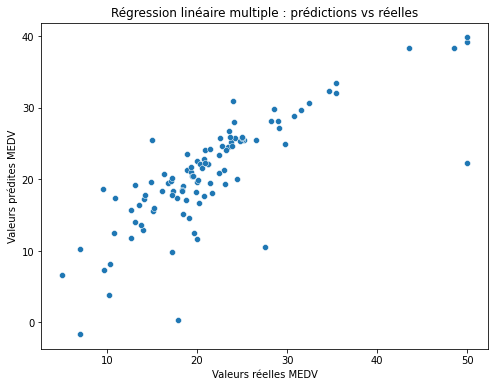

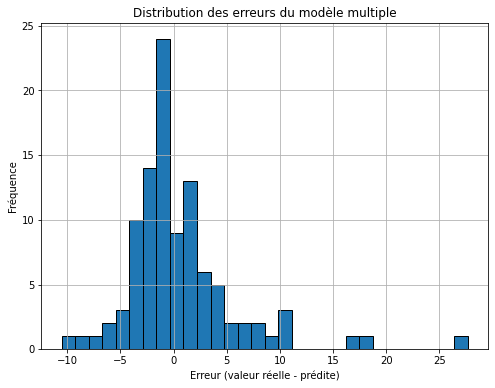

In [ ]:
results = pd.DataFrame({
    'Modèle': ['Simple (RM)', 'Multiple (RM, LSTAT, PTRATIO)'],
    'R²': [r2_simple, r2_multi],
    'RMSE': [rmse_simple, rmse_multi]
})
print(results)


print("📉 Étape 8 – Visualisation des erreurs du modèle multiple")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_multi)
plt.xlabel("Valeurs réelles MEDV")
plt.ylabel("Valeurs prédites MEDV")
plt.title("Régression linéaire multiple : prédictions vs réelles")
plt.show()

# Histogramme des erreurs (solution sans seaborn)
errors = y_test - y_pred_multi

plt.figure(figsize=(8,6))
plt.hist(errors, bins=30, edgecolor='black')
plt.title("Distribution des erreurs du modèle multiple")
plt.xlabel("Erreur (valeur réelle - prédite)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

# prediction prix

In [ ]:
nb_piece = int(input())
model_simple.predict([[nb_piece]])[0]

7


29.191790947346142

In [ ]:
# Exemple : prédire le prix d'une maison selon le nombre moyen de pièces

# Supposons qu'une maison ait 6,5 pièces en moyenne :
nb_piece = 4

# Prédiction avec le modèle
predicted_price = model_simple.predict([[nb_piece]])[0]

print(f"Pour une maison avec {nb_piece} pièces en moyenne :")
print(f"Prix estimé : {predicted_price:.2f} milliers de dollars")
print(f"soit environ {predicted_price * 1000:.0f} $")


Pour une maison avec 4 pièces en moyenne :
Prix estimé : 1.15 milliers de dollars
soit environ 1147 $


C:\Users\JOSEPH LAROCHE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1]:
import numpy as np


ModuleNotFoundError: No module named 'numpy'